<a href="https://colab.research.google.com/github/nataliavalero-data/Talento-Tech/blob/main/_PROYECTO_Nat_Pizza_Store_Order_Detail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Lectura
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Resumen del Dataset**
**Nombre del Dataset:** Pizza Data Set - Order Detail

**Enlace al Dataset:** https://www.kaggle.com/datasets/umairhayat/pizza-data-set-order-detail/data

**Descripción General:**
 Este dataset contiene registros detallados de pedidos de pizza realizados en un restaurante. Es útil para realizar análisis de ventas, operaciones y patrones de compra.

**Columnas Principales:**
*   OrderID: Identificador único para cada pedido.
*   PizzaType: Tipo de pizza solicitada en el pedido.
*   Quantity: Cantidad de pizzas pedidas.
*   UnitPrice: Precio unitario de la pizza.
*   TotalPrice: Precio total del pedido (cantidad x precio unitario).
*   OrderDate: Fecha en que se realizó el pedido.
*   CustomerID: Identificador del cliente que realizó el pedido.
*   DeliveryTime: Tiempo de entrega del pedido.

**Posibles Usos:**


*   Análisis de Ventas: Evaluar las tendencias de ventas, tipos de pizzas más populares, y ingresos generados.

*   Optimización de Operaciones: Analizar el tiempo de entrega y la eficiencia del proceso de pedidos.

*   Segmentación de Clientes: Estudiar los patrones de compra de los clientes para campañas de marketing dirigidas.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sqlite3


In [ ]:


# Cargar los datos
order_details = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/TalentoTech/Proyecto/order_details.xlsx')
orders = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/TalentoTech/Proyecto/orders.xlsx')
pizza_types = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/TalentoTech/Proyecto/pizza_types.xlsx')
pizzas = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/TalentoTech/Proyecto/pizzas.xlsx')

# Ver las primeras filas de cada DataFrame
print(order_details.head())
print(orders.head())
print(pizza_types.head())
print(pizzas.head())

# Unir las tablas para análisis integrados
data = pd.merge(order_details, orders, on='order_id')
data = pd.merge(data, pizzas, on='pizza_id')
data = pd.merge(data, pizza_types, on='pizza_type_id')

# Verificar la unión
print(data.head())


   order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1
   order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30
  pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chicken   
3     ckn_pesto       The Chicken Pesto Pizza  Chicken   
4    southw_ckn   The Southwest Chicken Pizza  Chicken   

                                         ingredients  
0  Barbecued Chicken--Red Peppers--Green Peppers-...  
1  Chic

## ***Shape del Dataset***

In [ ]:
data.shape




(48620, 12)

## ***Información del Dataset***

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [ ]:
data.describe()

,order_details_id,order_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132
std,14035.529381,6180.119770,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


## ***Verificar si hay valores nulos en el dataset***

In [ ]:
data.isnull().sum()


,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
date,0
time,0
pizza_type_id,0
size,0
price,0
name,0


## ***Verificar si hay lineas duplicadas en el dataset***

In [ ]:
data.duplicated().sum()

0


# ***Ejecutar Consultas SQL***

In [ ]:
 # Crear una conexión a la base de datos en memoria
conn = sqlite3.connect(':memory:')

# Cargar los datos en tablas SQL en memoria
order_details.to_sql('order_details', conn, index=False, if_exists='replace')
orders.to_sql('orders', conn, index=False, if_exists='replace')
pizza_types.to_sql('pizza_types', conn, index=False, if_exists='replace')
pizzas.to_sql('pizzas', conn, index=False, if_exists='replace')

96

## ***Reemplazar textos***

In [ ]:
pizza_types['name'] = pizza_types['name'].str.replace('--', ', ')
pizza_types['ingredients'] = pizza_types['ingredients'].str.replace('--', ', ')


## ***Total de Ventas por Tipo de Pizza***

In [ ]:
query = """
SELECT pizza_types.name, SUM(pizzas.price * order_details.quantity) AS total_sales
FROM order_details
JOIN pizzas ON order_details.pizza_id = pizzas.pizza_id
JOIN pizza_types ON pizzas.pizza_type_id = pizza_types.pizza_type_id
GROUP BY pizza_types.name
ORDER BY total_sales DESC;
"""

total_sales_by_type = pd.read_sql_query(query, conn)
print(total_sales_by_type)


                                          name  total_sales
0                       The Thai Chicken Pizza     43434.25
1                   The Barbecue Chicken Pizza     42768.00
2                 The California Chicken Pizza     41409.50
3                     The Classic Deluxe Pizza     38180.50
4                      The Spicy Italian Pizza     34831.25
5                  The Southwest Chicken Pizza     34705.75
6                    The Italian Supreme Pizza     33476.75
7                           The Hawaiian Pizza     32273.25
8                        The Four Cheese Pizza     32265.70
9                           The Sicilian Pizza     30940.50
10                         The Pepperoni Pizza     30161.75
11                             The Greek Pizza     28454.10
12                          The Mexicana Pizza     26780.75
13                       The Five Cheese Pizza     26066.50
14                     The Pepper Salami Pizza     25529.00
15                 The Italian Capocollo

## ***Número de Pedidos por Mes***

In [ ]:
query = """
SELECT strftime('%Y-%m', orders.date) AS month, COUNT(orders.order_id) AS total_orders
FROM orders
GROUP BY month
ORDER BY month
"""

orders_per_month = pd.read_sql_query(query, conn)
print(orders_per_month)


      month  total_orders
0   2015-01          1845
1   2015-02          1685
2   2015-03          1840
3   2015-04          1799
4   2015-05          1853
5   2015-06          1773
6   2015-07          1935
7   2015-08          1841
8   2015-09          1661
9   2015-10          1646
10  2015-11          1792
11  2015-12          1680


## ***Total de Ventas por Hora del Día***

In [ ]:
query = """
SELECT
    strftime('%H', orders.date || ' ' || orders.time) AS hour,
    SUM(pizzas.price * order_details.quantity) AS total_sales
FROM
    orders
JOIN
    order_details ON orders.order_id = order_details.order_id
JOIN
    pizzas ON order_details.pizza_id = pizzas.pizza_id
GROUP BY
    hour
ORDER BY
    total_sales
"""

sales_by_hour = pd.read_sql_query(query, conn)
print(sales_by_hour)


   hour  total_sales
0    09        83.00
1    10       303.65
2    23      1121.35
3    22     22815.15
4    21     42029.80
5    11     44935.80
6    15     52992.30
7    20     58215.40
8    14     59201.40
9    16     70055.40
10   19     72628.90
11   17     86237.45
12   18     89296.85
13   13    106065.70
14   12    111877.90



# ***Visualización***

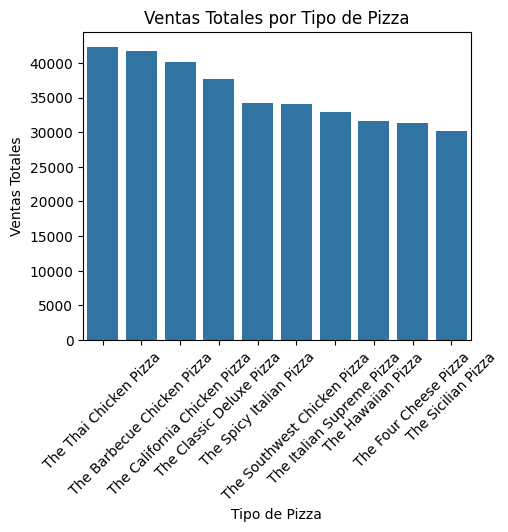

In [ ]:
# Total de ventas por tipo de pizza
sales_by_type = data.groupby('name')['price'].sum().reset_index()
# Ordenar los datos por ventas totales en orden descendente
sales_by_type = sales_by_type.sort_values(by='price', ascending=False)
# Seleccionar las 10 pizzas más vendidas
top_10_sales_by_type = sales_by_type.head(10)

plt.figure(figsize=(5, 4))
sns.barplot(x='name', y='price', data=top_10_sales_by_type)
plt.title('Ventas Totales por Tipo de Pizza')
plt.xlabel('Tipo de Pizza')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Usando Plotly para gráficos interactivos
fig = px.scatter(data, x='quantity', y='price', color='name', title='Scatter plot of Quantity vs Price')
fig.show()

In [ ]:
!pip install pydantic-settings
!pip install pandas-profiling
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5d956550250c9c22e1e2247c06b3dfb262708b91e89a19d77403a1bb35b6daad
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
prof = ProfileReport(data)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]